Técnicas de Avaliação de Modelo 

Nesse primeiro exemplo iremos avaliar um modelo Random Florest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt 

In [2]:
# Importando dados de concessão de crédito: 
credito = pd.read_csv('Credit3.csv', sep=";")
credito.head()

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


In [3]:
# Contando a classe: 
credito.groupby(['class'])['class'].count()

class
0    300
1    700
Name: class, dtype: int64

Temos 300 zeros que são maus pagadores
Temos 700 uns que são bons pagadores

Podemos ver que os dados estão desbalanceados

In [4]:
# Separando os previsores da classe: 
previsores = credito.iloc[:,1:10].values
classe = credito.iloc[:,10].values
previsores

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [5]:
# Fazendo Label Encoding de atributos categóricos: 
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0]) # CheckingStatus
previsores[:,1] = labelencoder.fit_transform(previsores[:,1]) # CreditHistory

In [6]:
# Separando dados de treino e teste: 
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 123)

In [7]:
# Criando Random Florest e treinando: 
modelorf = RandomForestClassifier(n_estimators = 100)
modelorf.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [8]:
# Fazendo a previsão e matriz de confusão: 
previsoes_rf = modelorf.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes_rf)
confusao

array([[ 42,  58],
       [ 19, 181]], dtype=int64)

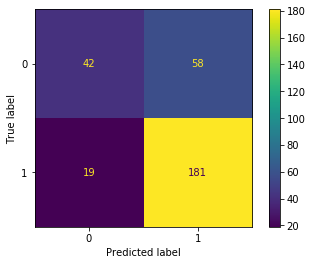

In [9]:
# Plotando a Matriz de confusão: 
plot_confusion_matrix(modelorf, X_teste, y_teste)

In [10]:
# Calculando a acurácia: 
acuracia = accuracy_score(y_teste, previsoes_rf)
print(acuracia)

0.7433333333333333


In [11]:
# Erro: 
erro = 1 - acuracia
print(erro)

0.2566666666666667


In [12]:
# Recall: 
recall = recall_score(y_teste, previsoes_rf) 
print(recall)

0.905


In [13]:
# Precisão: 
precision = precision_score(y_teste, previsoes_rf) 
print(precision)

0.7573221757322176


In [14]:
# F1 Score: 
f1 = f1_score(y_teste, previsoes_rf) 
print(f1)

0.8246013667425968


In [15]:
# Area abaixo da curva ROC: 
auc = roc_auc_score(y_teste, previsoes_rf) 
auc

0.6625000000000001

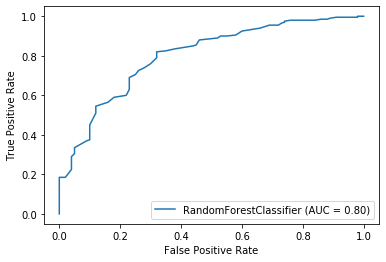

In [16]:
# Plotando a curva ROC: 
plot_roc_curve(modelorf, X_teste, y_teste) 

In [17]:
# Log: 
log = log_loss(y_teste, previsoes_rf) 
log
# Usado quando temos múltiplas classes, penaliza os erros 

8.86510719686358